In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d
from pathlib import Path
import json
from keras.models import load_model, Model
import matplotlib.patches as patches
from keras.layers import Activation, Softmax, Input

In [2]:
# D. Cashon
# Experimenting with mapping convnet output to image patch
with open('/mnt/disks/gscratch/bdd100k_labels_images_val.json', 'rb') as foo:
    buf = foo.read()
    result = json.loads(buf.decode('utf-8'))


In [3]:
img_path = '/mnt/disks/gscratch/val/'

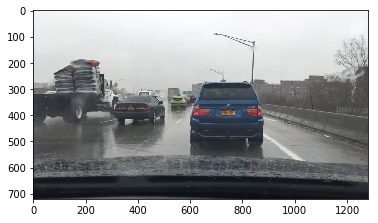

In [4]:
num = 60
test_img = plt.imread(img_path + result[num]['name'])
plt.imshow(test_img)

In [5]:
# load model
classifier = load_model('/mnt/disks/gscratch/models/classifier3_epoch5.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [16]:
x = Input(shape =(None, None, 3))
classifier_predictor = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)
classifier_predictor = classifier_predictor(x)
classifier_predictor = Softmax(axis=3)(classifier_predictor)
predictor = Model(inputs=x, outputs=classifier_predictor)

In [31]:
# predict
test_img_reshape = np.reshape(test_img, (1, 720, 1280, 3))
model_output = predictor.predict(test_img_reshape / 255)
mapper = extract_patches_2d(test_img[:256,:], (256, 256))
mapper_output = classifier.predict(mapper / 255)